# Chapter 0: Introduction

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df_baseball_test = pd.read_csv(r'C:\Users\Aleks\Final_Project_ML\data_sets\Baseball_test.csv')
df_baseball_train  = pd.read_csv(r'C:\Users\Aleks\Final_Project_ML\data_sets\Baseball_train.csv')

In [15]:
#Sample of the training data
df_baseball_train.head()
df_baseball_train.info()
df_baseball_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  35 non-null     int64  
 1   Name        35 non-null     object 
 2   AtBat       35 non-null     int64  
 3   Hits        35 non-null     int64  
 4   HmRun       35 non-null     int64  
 5   Runs        35 non-null     int64  
 6   RBI         35 non-null     int64  
 7   Walks       35 non-null     int64  
 8   Years       35 non-null     int64  
 9   CAtBat      35 non-null     int64  
 10  CHits       35 non-null     int64  
 11  CHmRun      35 non-null     int64  
 12  CRuns       35 non-null     int64  
 13  CRBI        35 non-null     int64  
 14  CWalks      35 non-null     int64  
 15  League      35 non-null     object 
 16  Division    35 non-null     object 
 17  PutOuts     35 non-null     int64  
 18  Assists     35 non-null     int64  
 19  Errors      35 non-null     int

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,23.000000
mean,150.771429,370.485714,97.400000,9.714286,49.457143,45.342857,36.371429,6.771429,2344.571429,625.428571,60.828571,316.285714,279.628571,227.457143,278.942857,87.942857,7.057143,451.159435
std,86.489403,160.738072,45.770656,8.810326,25.095515,25.088013,20.970688,4.965088,2023.709658,540.732634,87.033626,273.418616,282.395747,219.849593,294.470606,133.212555,6.009516,396.810733
min,9.000000,19.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,41.000000,13.000000,0.000000,3.000000,4.000000,4.000000,0.000000,0.000000,0.000000,70.000000
25%,70.500000,216.000000,56.000000,2.000000,31.000000,28.500000,22.500000,2.500000,619.500000,160.500000,8.000000,79.500000,55.500000,53.500000,94.500000,6.500000,2.500000,152.500000
50%,144.000000,401.000000,100.000000,7.000000,53.000000,44.000000,33.000000,6.000000,1416.000000,398.000000,31.000000,210.000000,198.000000,167.000000,233.000000,15.000000,5.000000,297.500000
75%,225.500000,505.500000,129.000000,15.000000,69.000000,54.000000,44.500000,11.000000,3806.500000,1022.500000,81.500000,536.500000,424.500000,328.500000,305.500000,137.500000,11.000000,637.500000
max,315.000000,627.000000,177.000000,35.000000,98.000000,100.000000,87.000000,18.000000,7318.000000,1926.000000,442.000000,901.000000,1210.000000,866.000000,1224.000000,482.000000,22.000000,1350.000000


# Chapter 1: Exploratory Data Analysis

# 1.1 Cleaning Dataset

In [18]:
#Checking how many missing values there are from Salary
df_baseball_train.isnull().sum()

Unnamed: 0     0
Name           0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        12
NewLeague      0
dtype: int64

In [21]:
#Handling the missing salary
df_baseball_train = df_baseball_train.dropna(subset=['Salary']).reset_index(drop=True)

# 1.2 Salary Sorting

In [49]:
df_baseball_train['LogSalary'] = np.log(df_baseball_train['Salary'])

Text(0.5, 1.0, 'Log Salary Distribution')

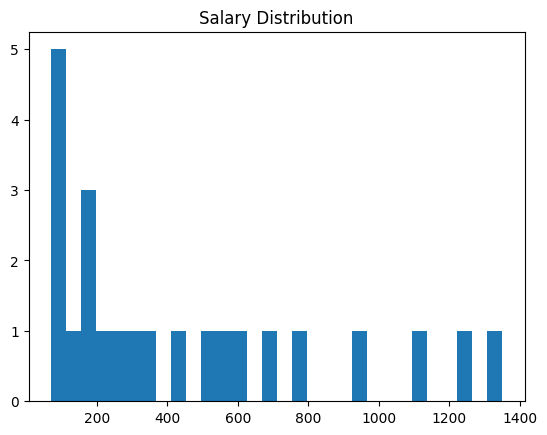

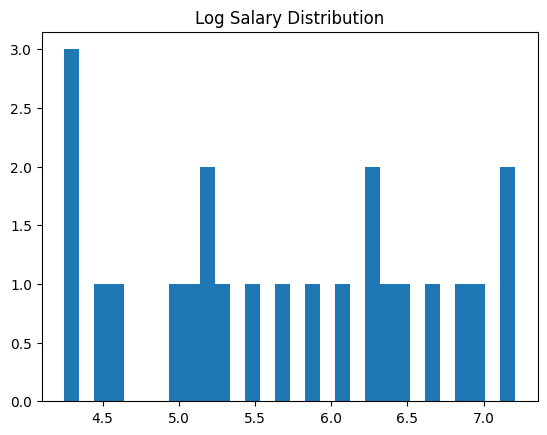

In [50]:
plt.hist(df_baseball_train['Salary'], bins=30)
plt.title('Salary Distribution')

plt.figure()
plt.hist(df_baseball_train['LogSalary'], bins=30)
plt.title('Log Salary Distribution')

# 1.3 League Analysis

<Axes: title={'center': 'Salary'}, xlabel='NewLeague'>

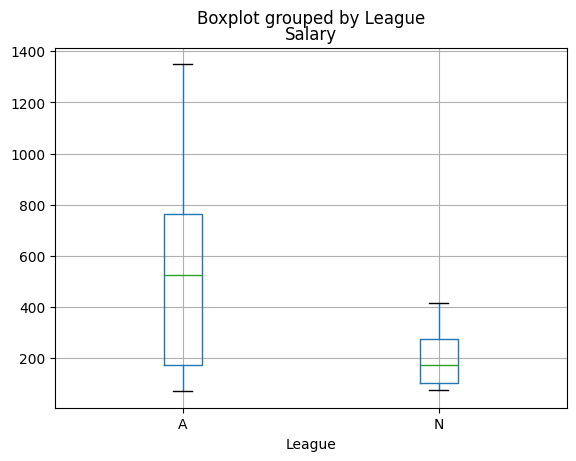

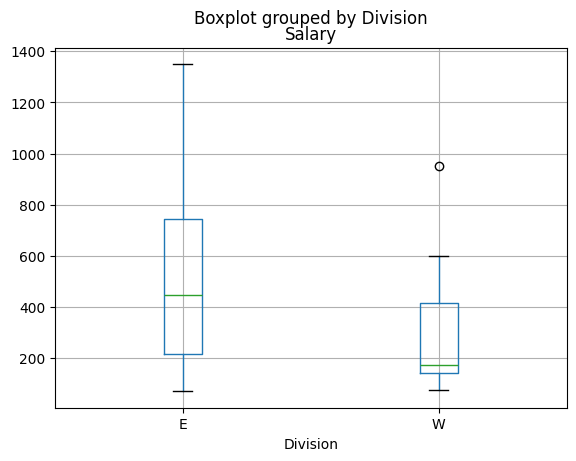

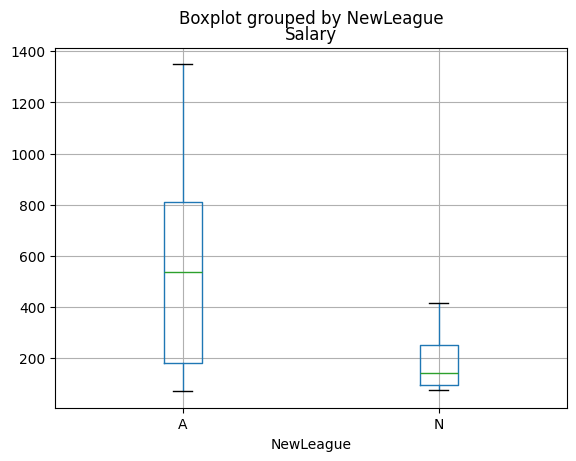

In [52]:
#Visualized boxplot diagram sorting the salary's by division
df_baseball_train.boxplot(column='Salary', by='League')
df_baseball_train.boxplot(column='Salary', by='Division')
df_baseball_train.boxplot(column='Salary', by='NewLeague')


In [51]:
#Changing the type to category for better assortment 
player_div_category = ['League','Division', 'NewLeague']
for cat in player_div_category:
    df_baseball_train[cat] = df_baseball_train[cat].astype('category')
    df_baseball_test[cat] = df_baseball_test[cat].astype('category')

# 1.4 Salary to Hits

Text(0.5, 1.0, 'Salary vs Hits')

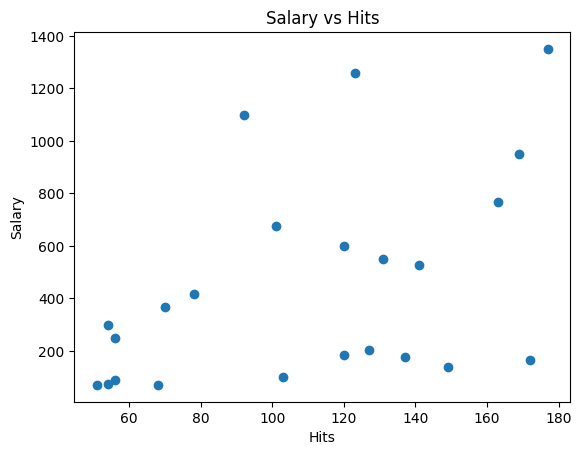

In [34]:
#Shows the correlation between salary and hits
plt.scatter(df_baseball_train['Hits'], df_baseball_train['Salary'])
plt.xlabel('Hits')
plt.ylabel('Salary')
plt.title('Salary vs Hits')


# 1.5 Years in the League to Pay

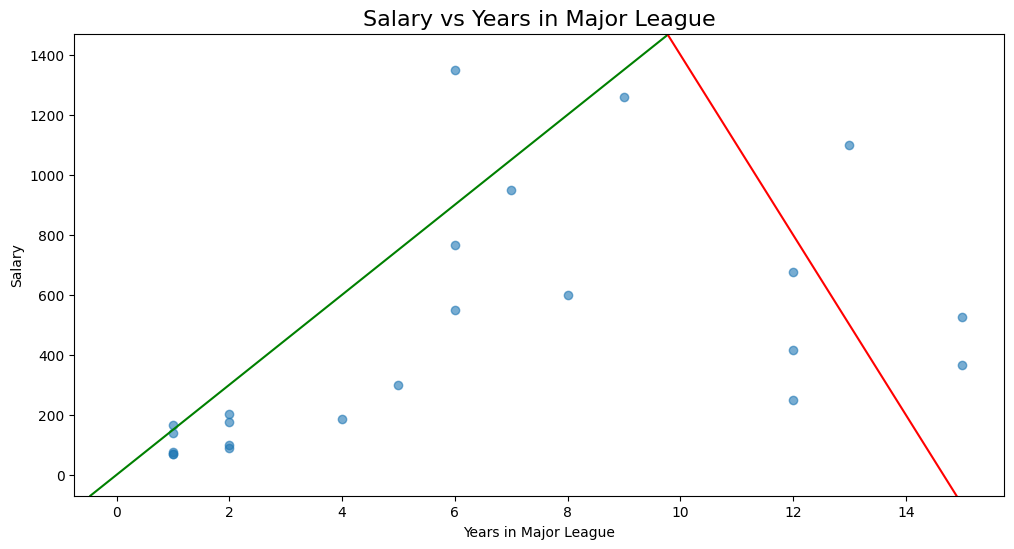

In [48]:
#Shows the correlation between age and pay

plt.figure(figsize=(12, 6))

plt.scatter(df_baseball_train['Years'], df_baseball_train['Salary'], alpha=0.6)
plt.title('Salary vs Years in Major League', fontsize=16)
plt.axline((0,0), slope = 150, color = 'g')
plt.axline((10, 1400), slope = -300, color ='r')
plt.xlabel('Years in Major League')
plt.ylabel('Salary')

plt.show()


# 1.6 Cleaned csv

In [54]:
#Updated the new training set with the dropped salary's after cleaning
df_baseball_train.to_csv(r'C:\Users\Aleks\Final_Project_ML\data_sets\Baseball_train.csv')